In [4]:
import pandas as pd
import numpy as np
import requests
from pycoingecko import CoinGeckoAPI
import datetime
import cufflinks as cf
import matplotlib.pyplot as plt
import altair as alt


In [8]:
cg = CoinGeckoAPI()

In [9]:

def get_price(coin):
    price_dict = cg.get_price(ids=coin, vs_currencies='usd')
    return price_dict[coin]['usd']

In [495]:
def get_history(coin):
    coin_history = cg.get_coin_market_chart_by_id(id=coin, vs_currency='usd', days='max')

    days = [i[0] for i in coin_history['prices']]
    days = pd.to_datetime(days, unit='ms')

    prices = [i[1] for i in coin_history['prices']]
cosmos
    days = days[:-1]
    prices = prices[:-1]

#    data = 
    df = pd.DataFrame(data={'price': prices}, index=days)
    
    return df

    

In [658]:
def get_price_at_redmarch(coin, date):
    return cg.get_coin_history_by_id(coin,date)['market_data']['current_price']['usd']



KeyError: 'market_data'

In [60]:
coins_list = ['bitcoin', 'chainlink', 'ethereum', 'cardano', 'vechain', 'ripple', 'litecoin', 
             'stellar', 'monero', 'cosmos', 'binancecoin', 'bitcoin-cash', 'eos', 'tron', 'dash', 'neo', 'tezos']

In [703]:
def get_listprices_onredmarch(coins_list):
    prices_list = []
    for coin in coins_list:
        price_then = get_price_at_redmarch(coin, '13-03-2020')
        prices_list.append(price_then)
    return prices_list

In [685]:
def get_current_prices_for_list(coins_list):
    prices_list = []
    for coin in coins_list:
        price_then = cg.get_price(coin, 'usd')[coin]['usd']
        prices_list.append(price_then)
    return prices_list

In [337]:
get_history('bitcoin').tail(10)

,price
2021-02-24,48691.894832
2021-02-25,49849.378714
2021-02-26,46992.665450
2021-02-27,46551.487477
2021-02-28,46653.526399
2021-03-01,44970.163460
2021-03-02,49787.339959
2021-03-03,48532.236790
2021-03-04,50577.457469
2021-03-05,48727.451201


In [160]:
currency_hist = get_history('bitcoin')
currency_hist['20D MA'] = currency_hist.iloc[:,0].rolling(window=20).mean()
currency_hist

,price,20D MA
2018-12-20,3687.750553,NaN
2018-12-21,4065.097238,NaN
2018-12-22,3846.227498,NaN
2018-12-23,3960.567773,NaN
2018-12-24,3941.617740,NaN
...,...,...
2021-02-22,57669.303527,46276.099355
2021-02-23,54410.856295,47222.342873
2021-02-24,48691.894832,47782.201734
2021-02-25,49849.378714,48433.845265


In [88]:
currency_hist['% extension from 20D MA '] = ((currency_hist['price']-currency_hist['20D MA'])/currency_hist['price'])*100


In [91]:
currency_hist['ln(price/20D MA)'] = np.log(currency_hist['price']/currency_hist['20D MA'])

In [92]:
currency_hist

,price,20D MA,% extension from 20D MA,ln(price/20D MA)
2020-02-28,8781.175282,NaN,NaN,NaN
2020-02-29,8717.331431,NaN,NaN,NaN
2020-03-01,8552.989119,NaN,NaN,NaN
2020-03-02,8567.802249,NaN,NaN,NaN
2020-03-03,8905.876104,NaN,NaN,NaN
...,...,...,...,...
2021-02-22,57669.303527,46276.099355,19.756098,0.220099
2021-02-23,54410.856295,47222.342873,13.211543,0.141697
2021-02-24,48691.894832,47782.201734,1.868264,0.018859
2021-02-25,49849.378714,48433.845265,2.839621,0.028807


In [93]:
Ben_statememnts = [
    "I don't consider Ethereum an altcoin",
    
    "I can't tell you what's gonna happen in the short term I just try to react to it",
    
    "Remember it's better to accumulate a coin when it's going quiet not when it's going parabolic",
    
    "If btc makes sideways action, then expect altcoins to start running again",
    
    "It's all fun and games until you wake up one day and you're down 20 or 30%" ,
    
    "Getting your portfolio in a position where you can handle all three scenarios is the way to win in crypto",
    
    "The main reason I hold [[LINK]] is: its negative volatility is offset by [[Bitcoin]] positive volatility",
    
    "You'll never go broke taking profits",
    
    "You'll never go broke taking profits",
    
    "We need Ethereum to outperform Bitcoin in order to justify holding it",
    
    "Expecting an immediate ROI is pretty much gambling",
    
    "I think if you're in crypto, I think the majority of your portfolio should be in Bitcoin",
    
    "The faster you get to thinking of crypto in terms of more than USD, the better. we look at Ethereum and LINK in terms of Bitcoin not just USD. this will help you understand what’s going on and be intuitive about what to do",
    
    "The goal is to time momentum shifts in the market not chase pumps",
    
    "The focus is to slowly move in and out, not pretend like we can time bottoms and tops",
]

In [126]:
randnum = np.random.randint(len(Ben_statememnts))
statement = Ben_statememnts[randnum]
statement

"I think if you're in crypto, I think the majority of your portfolio should be in Bitcoin"

In [145]:
def change_percent24(df):
    prices_list = list(df['price'])
    percent_change24 = []
    for i in range(len(prices_list)):
        if i == 0:
            change_24 = 0
            percent_change24.append(change_24)
        else:
            change_24 = ((prices_list[i]-prices_list[i-1])/prices_list[i])*100
            change_24 = round(change_24, 2)
            percent_change24.append(change_24)
    return percent_change24




In [161]:
ch_test = change_percent24(currency_hist)
currency_hist['24% change BTC'] = ch_test
currency_hist

,price,20D MA,24% change BTC
2018-12-20,3687.750553,NaN,0.00
2018-12-21,4065.097238,NaN,9.28
2018-12-22,3846.227498,NaN,-5.69
2018-12-23,3960.567773,NaN,2.89
2018-12-24,3941.617740,NaN,-0.48
...,...,...,...
2021-02-22,57669.303527,46276.099355,2.24
2021-02-23,54410.856295,47222.342873,-5.99
2021-02-24,48691.894832,47782.201734,-11.75
2021-02-25,49849.378714,48433.845265,2.32


In [162]:
eth = get_history('ethereum')
ch = change_percent24(eth)
eth['24% change ETH'] = ch
eth

,price,24% change ETH
2018-12-20,99.491554,0.00
2018-12-21,114.429184,13.05
2018-12-22,107.853181,-6.10
2018-12-23,115.045822,6.25
2018-12-24,129.206503,10.96
...,...,...
2021-02-22,1941.426768,0.62
2021-02-23,1788.615210,-8.54
2021-02-24,1563.924606,-14.37
2021-02-25,1628.391534,3.96


In [156]:
currency_hist[currency_hist['24% change'] <= -10]

,price,20D MA,24% change
2019-06-28,11178.682998,9514.608216,-16.26
2019-07-15,10285.461109,11571.536546,-11.02
2019-07-17,9538.827124,11353.817948,-14.39
2019-09-25,8702.713528,10164.777120,-11.45
2020-03-09,8041.365538,9130.775655,-10.71
2020-03-13,5142.990459,8624.434074,-54.30
2020-09-04,10197.459823,11609.158156,-11.97
2021-01-22,30913.695736,36055.291811,-15.12
2021-02-24,48691.894832,47782.201734,-11.75


In [489]:
BTCETH = currency_hist.join(eth, lsuffix='_BTC', rsuffix='_ETH')
BTCETH

,price_BTC,20D MA,24% change BTC,price above 20D MA,week_number,price_ETH,24% change ETH
2018-12-20,3687.750553,NaN,0.00,False,51,99.491554,0.00
2018-12-21,4065.097238,NaN,9.28,False,51,114.429184,13.05
2018-12-22,3846.227498,NaN,-5.69,False,51,107.853181,-6.10
2018-12-23,3960.567773,NaN,2.89,False,51,115.045822,6.25
2018-12-24,3941.617740,NaN,-0.48,False,52,129.206503,10.96
...,...,...,...,...,...,...,...
2021-02-22,57669.303527,46276.099355,2.24,True,8,1941.426768,0.62
2021-02-23,54410.856295,47222.342873,-5.99,True,8,1788.615210,-8.54
2021-02-24,48691.894832,47782.201734,-11.75,True,8,1563.924606,-14.37
2021-02-25,49849.378714,48433.845265,2.32,True,8,1628.391534,3.96


In [176]:
BTCETH[BTCETH['24% change BTC'] <= -10]

,price_BTC,20D MA,24% change BTC,price_ETH,24% change ETH
2019-06-28,11178.682998,9514.608216,-16.26,295.841653,-14.03
2019-07-15,10285.461109,11571.536546,-11.02,227.122073,-19.02
2019-07-17,9538.827124,11353.817948,-14.39,199.940522,-15.12
2019-09-25,8702.713528,10164.777120,-11.45,168.673580,-19.17
2020-03-09,8041.365538,9130.775655,-10.71,198.819642,-19.40
2020-03-13,5142.990459,8624.434074,-54.30,110.597898,-75.61
2020-09-04,10197.459823,11609.158156,-11.97,383.691531,-14.51
2021-01-22,30913.695736,36055.291811,-15.12,1122.912433,-23.42
2021-02-24,48691.894832,47782.201734,-11.75,1563.924606,-14.37


In [183]:
def percent_comparison(coin):

    BTCdf = get_history('bitcoin')
    coindf = get_history(coin)
    BTC_perchange = change_percent24(BTCdf)
    BTCdf['24% change'] = BTC_perchange
    coin_perchange = change_percent24(coindf)
    coindf['24% change'] = coin_perchange

    coinBTC = BTCdf.join(coindf, lsuffix='_BTC', rsuffix='_{}'.format(coin))

    return coinBTC











In [184]:
linkbtc = percent_comparison('chainlink')
linkbtc


,price_BTC,24% change_BTC,price_chainlink,24% change_chainlink
2018-12-20,3687.750553,0.00,0.289446,0.00
2018-12-21,4065.097238,9.28,0.332749,13.01
2018-12-22,3846.227498,-5.69,0.291045,-14.33
2018-12-23,3960.567773,2.89,0.301470,3.46
2018-12-24,3941.617740,-0.48,0.305559,1.34
...,...,...,...,...
2021-02-22,57669.303527,2.24,34.247838,0.04
2021-02-23,54410.856295,-5.99,31.668361,-8.15
2021-02-24,48691.894832,-11.75,25.758911,-22.94
2021-02-25,49849.378714,2.32,28.158214,8.52


In [187]:
linkbtc[linkbtc['24% change_BTC'] <= -10]

,price_BTC,24% change_BTC,price_chainlink,24% change_chainlink
2019-06-28,11178.682998,-16.26,2.280353,0.57
2019-07-15,10285.461109,-11.02,2.790395,-14.00
2019-07-17,9538.827124,-14.39,2.209900,-23.13
2019-09-25,8702.713528,-11.45,1.749077,-2.78
2020-03-09,8041.365538,-10.71,4.044218,-7.50
2020-03-13,5142.990459,-54.30,1.974428,-93.64
2020-09-04,10197.459823,-11.97,11.783796,-25.61
2021-01-22,30913.695736,-15.12,18.470589,-18.57
2021-02-24,48691.894832,-11.75,25.758911,-22.94


In [195]:
eth = get_history('ethereum')
ch = change_percent24(eth)
eth['24% change ETH'] = ch
eth

,price,24% change ETH
2018-12-20,99.491554,0.00
2018-12-21,114.429184,13.05
2018-12-22,107.853181,-6.10
2018-12-23,115.045822,6.25
2018-12-24,129.206503,10.96
...,...,...
2021-02-22,1941.426768,0.62
2021-02-23,1788.615210,-8.54
2021-02-24,1563.924606,-14.37
2021-02-25,1628.391534,3.96


In [197]:
BTCLINKETH = linkbtc.join(eth, rsuffix='_ETH')

BTCLINKETH

,price_BTC,24% change_BTC,price_chainlink,24% change_chainlink,price,24% change ETH
2018-12-20,3687.750553,0.00,0.289446,0.00,99.491554,0.00
2018-12-21,4065.097238,9.28,0.332749,13.01,114.429184,13.05
2018-12-22,3846.227498,-5.69,0.291045,-14.33,107.853181,-6.10
2018-12-23,3960.567773,2.89,0.301470,3.46,115.045822,6.25
2018-12-24,3941.617740,-0.48,0.305559,1.34,129.206503,10.96
...,...,...,...,...,...,...
2021-02-22,57669.303527,2.24,34.247838,0.04,1941.426768,0.62
2021-02-23,54410.856295,-5.99,31.668361,-8.15,1788.615210,-8.54
2021-02-24,48691.894832,-11.75,25.758911,-22.94,1563.924606,-14.37
2021-02-25,49849.378714,2.32,28.158214,8.52,1628.391534,3.96


In [198]:
ada = get_history('cardano')
ch = change_percent24(ada)
ada['24% change ETH'] = ch
ada

,price,24% change ETH
2018-12-20,0.034897,0.00
2018-12-21,0.038880,10.24
2018-12-22,0.040443,3.86
2018-12-23,0.041621,2.83
2018-12-24,0.043796,4.97
...,...,...
2021-02-22,1.104583,-1.91
2021-02-23,1.103137,-0.13
2021-02-24,0.955780,-15.42
2021-02-25,1.058849,9.73


In [199]:
BTCLINKETHADA = BTCLINKETH.join(ada, lsuffix='_ETH', rsuffix='_ADA')

BTCLINKETHADA

,price_BTC,24% change_BTC,price_chainlink,24% change_chainlink,price_ETH,24% change ETH_ETH,price_ADA,24% change ETH_ADA
2018-12-20,3687.750553,0.00,0.289446,0.00,99.491554,0.00,0.034897,0.00
2018-12-21,4065.097238,9.28,0.332749,13.01,114.429184,13.05,0.038880,10.24
2018-12-22,3846.227498,-5.69,0.291045,-14.33,107.853181,-6.10,0.040443,3.86
2018-12-23,3960.567773,2.89,0.301470,3.46,115.045822,6.25,0.041621,2.83
2018-12-24,3941.617740,-0.48,0.305559,1.34,129.206503,10.96,0.043796,4.97
...,...,...,...,...,...,...,...,...
2021-02-22,57669.303527,2.24,34.247838,0.04,1941.426768,0.62,1.104583,-1.91
2021-02-23,54410.856295,-5.99,31.668361,-8.15,1788.615210,-8.54,1.103137,-0.13
2021-02-24,48691.894832,-11.75,25.758911,-22.94,1563.924606,-14.37,0.955780,-15.42
2021-02-25,49849.378714,2.32,28.158214,8.52,1628.391534,3.96,1.058849,9.73


In [216]:
more_10 = BTCLINKETHADA[BTCLINKETHADA['24% change_BTC'] <= -10]
more_10.index

TypeError: 'DatetimeIndex' object is not callable

In [202]:
BTCLINKETHADA[['24% change_BTC', '24% change_chainlink', '24% change ETH_ETH', '24% change ETH_ADA']]

,24% change_BTC,24% change_chainlink,24% change ETH_ETH,24% change ETH_ADA
2018-12-20,0.00,0.00,0.00,0.00
2018-12-21,9.28,13.01,13.05,10.24
2018-12-22,-5.69,-14.33,-6.10,3.86
2018-12-23,2.89,3.46,6.25,2.83
2018-12-24,-0.48,1.34,10.96,4.97
...,...,...,...,...
2021-02-22,2.24,0.04,0.62,-1.91
2021-02-23,-5.99,-8.15,-8.54,-0.13
2021-02-24,-11.75,-22.94,-14.37,-15.42
2021-02-25,2.32,8.52,3.96,9.73


In [229]:
BTCLINKETHADA.to_csv('BTCLINKETHADA.csv')

In [224]:
more_10

,price_BTC,24% change_BTC,price_chainlink,24% change_chainlink,price_ETH,24% change ETH_ETH,price_ADA,24% change ETH_ADA
2019-06-28,11178.682998,-16.26,2.280353,0.57,295.841653,-14.03,0.086382,-13.31
2019-07-15,10285.461109,-11.02,2.790395,-14.00,227.122073,-19.02,0.059466,-12.98
2019-07-17,9538.827124,-14.39,2.209900,-23.13,199.940522,-15.12,0.052114,-12.52
2019-09-25,8702.713528,-11.45,1.749077,-2.78,168.673580,-19.17,0.038745,-19.77
2020-03-09,8041.365538,-10.71,4.044218,-7.50,198.819642,-19.40,0.043284,-13.76
2020-03-13,5142.990459,-54.30,1.974428,-93.64,110.597898,-75.61,0.023716,-68.94
2020-09-04,10197.459823,-11.97,11.783796,-25.61,383.691531,-14.51,0.095059,-21.50
2021-01-22,30913.695736,-15.12,18.470589,-18.57,1122.912433,-23.42,0.311240,-20.91
2021-02-24,48691.894832,-11.75,25.758911,-22.94,1563.924606,-14.37,0.955780,-15.42


In [497]:
BTC = get_history('bitcoin')
BTC.head()

BTC = BTC.reset_index()


In [499]:
BTC['year'] = BTC['index'].dt.year


,index,price,year
0,2013-04-28,135.30,2013
1,2013-04-29,141.96,2013
2,2013-04-30,135.30,2013
3,2013-05-01,117.00,2013
4,2013-05-02,103.43,2013


In [502]:
BTC_annual_price = BTC.groupby('year').mean()

In [515]:
BTC_annual_price = BTC_annual_price.iloc[0:-1,:]

In [516]:
BTC_annual_price.to_csv('BTC_annual_price.csv')

In [536]:
chart_line = alt.Chart(BTC_annual_price.reset_index()).mark_line().encode(
    alt.X('year:N'),
    alt.Y('price')

)

chart_circle = alt.Chart(BTC_annual_price.reset_index()).mark_point(size=40).encode(
    alt.X('year:N'),
    alt.Y('price')

)

chart = chart_line + chart_circle

In [539]:
def get_annual_price(coin):
    coin_df = get_history(coin)
    coin_df = coin_df.reset_index()
    coin_df['year'] = coin_df['index'].dt.year
    coin_df_annual_price = coin_df.groupby('year').mean()
    coin_df_annual_price = coin_df_annual_price.iloc[0:-1,:]
    coin_df_annual_price.to_csv('{}_annual_price.csv'.format(coin))

In [541]:
get_annual_price('ethereum')

In [542]:
get_annual_price('chainlink')
get_annual_price('cardano')
get_annual_price('polkadot')
get_annual_price('avalanche-2')

ValueError: {'error': 'Could not find coin with the given id'}

In [556]:
def change_percent24(df):
    prices_list = list(df['price_ETH'])
    percent_change24 = []
    for i in range(len(prices_list)):
        if i == 0:
            change_24 = 0
            percent_change24.append(change_24)
        else:
            change_24 = ((prices_list[i]-prices_list[i-1])/prices_list[i])*100
            change_24 = round(change_24, 2)
            percent_change24.append(change_24)
    return percent_change24




In [547]:
BTC = get_history('bitcoin')
ETH = get_history('ethereum')

In [554]:
BTCETH = BTC.join(ETH, lsuffix='_BTC', rsuffix='_ETH', how='inner')
weekly_dates = pd.date_range(BTCETH.index[0], BTCETH.index[-1], freq='W').to_series()
BTCETHW = BTCETH[BTCETH.index.isin(weekly_dates)]


In [555]:
change_24_BTC = change_percent24(BTCETHW)
BTCETHW['BTC 1W change percent'] = change_24_BTC

In [557]:
change_24_ETH = change_percent24(BTCETHW)
BTCETHW['ETH 1W change percent'] = change_24_ETH

In [559]:
BTCETHW.to_csv('BTCETH.csv')

In [ ]:
BTCETHW.to_csv('BTCETH.csv')

In [560]:
BTCETHW10 = BTCETHW[BTCETHW['BTC 1W change percent'] <= -10 ]


,price_BTC,price_ETH,BTC 1W change percent,ETH 1W change percent
2015-08-23,227.245400,1.355182,-13.45,-8.96
2015-11-15,320.484000,0.910826,-15.92,-13.14
2016-01-17,386.356000,1.321856,-15.75,22.84
2016-01-31,364.352000,2.298767,-10.62,7.27
2016-06-26,629.306000,13.845030,-21.41,11.66
2017-01-15,821.912500,9.785923,-10.48,-4.92
2017-03-19,1023.490101,44.088797,-20.23,47.61
2017-06-18,2577.219361,359.438712,-16.94,5.11
2017-07-16,1927.099066,156.468992,-30.73,-52.59
2017-09-10,4132.664642,292.779657,-12.09,-19.52


In [577]:
BTCETHW10['ETH dropped more'] = BTCETHW10['BTC 1W change percent'] > BTCETHW10['ETH 1W change percent']

In [578]:
BTCETHW10

,price_BTC,price_ETH,BTC 1W change percent,ETH 1W change percent,ETH dropped more
2015-08-23,227.245400,1.355182,-13.45,-8.96,False
2015-11-15,320.484000,0.910826,-15.92,-13.14,False
2016-01-17,386.356000,1.321856,-15.75,22.84,False
2016-01-31,364.352000,2.298767,-10.62,7.27,False
2016-06-26,629.306000,13.845030,-21.41,11.66,False
2017-01-15,821.912500,9.785923,-10.48,-4.92,False
2017-03-19,1023.490101,44.088797,-20.23,47.61,False
2017-06-18,2577.219361,359.438712,-16.94,5.11,False
2017-07-16,1927.099066,156.468992,-30.73,-52.59,True
2017-09-10,4132.664642,292.779657,-12.09,-19.52,True


In [627]:
# CTB = alt.Chart(BTCETHW10.reset_index()).mark_bar().encode(
#     x='index:O',
#     y=['BTC 1W change percent','ETH 1W change percent']
#     #color='year:N',
    
# )

HTE = alt.Chart(BTCETHW10.reset_index()).mark_bar().encode(
    x='index:O',
    y='ETH 1W change percent',
    color='ETH dropped more'
    #color='year:N',
    
).interactive()

HTE
# CTB

# df = pd.DataFrame({
#     'label': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
#     'value1': [1, 3, 2, 4, 5, 6, 4],
#     'value2': [2, 1, 2, 5, 3, 4, 2],
# })

# alt.Chart(BTCETHW10.reset_index()).transform_fold(
#   ['BTC 1W change percent', 'ETH 1W change percent'],
#   as_=['column', 'value']
# ).mark_bar().encode(
#   x='index:N',
#   y='value:Q',
#   color='column:N'
# )

alt.Chart(...)

In [581]:
def change_percent24_with_suffix(df, suffix):
    prices_list = list(df['price_{}'.format(suffix)])
    percent_change24 = []
    for i in range(len(prices_list)):
        if i == 0:
            change_24 = 0
            percent_change24.append(change_24)
        else:
            change_24 = ((prices_list[i]-prices_list[i-1])/prices_list[i])*100
            change_24 = round(change_24, 2)
            percent_change24.append(change_24)
    return percent_change24


# 20% percent drops 

## Ethereum 

In [585]:
BTC = get_history('bitcoin')
ETH = get_history('ethereum')

BTCETH = BTC.join(ETH, lsuffix='_BTC', rsuffix='_ETH', how='inner')
weekly_dates = pd.date_range(BTCETH.index[0], BTCETH.index[-1], freq='W').to_series()
BTCETHW = BTCETH[BTCETH.index.isin(weekly_dates)]

change_24_BTC = change_percent24_with_suffix(BTCETHW, 'BTC')
BTCETHW['BTC 1W change percent'] = change_24_BTC

change_24_ETH = change_percent24_with_suffix(BTCETHW, 'ETH')
BTCETHW['ETH 1W change percent'] = change_24_ETH

BTCETHW10 = BTCETHW[BTCETHW['BTC 1W change percent'] <= -20 ]

BTCETHW10['ETH dropped more'] = BTCETHW10['BTC 1W change percent'] > BTCETHW10['ETH 1W change percent']

BTCETHW10.to_csv('BTCETH20drop.csv', index_label='Date')

## Link

In [588]:
BTC = get_history('bitcoin')
LINK = get_history('chainlink')

BTCLINK = BTC.join(LINK, lsuffix='_BTC', rsuffix='_LINK', how='inner')
weekly_dates = pd.date_range(BTCLINK.index[0], BTCLINK.index[-1], freq='W').to_series()
BTCLINKW = BTCLINK[BTCLINK.index.isin(weekly_dates)]

change_24_BTC = change_percent24_with_suffix(BTCLINKW, 'BTC')
BTCLINKW['BTC 1W change percent'] = change_24_BTC

change_24_LINK = change_percent24_with_suffix(BTCLINKW, 'LINK')
BTCLINKW['LINK 1W change percent'] = change_24_LINK

BTCLINKW10 = BTCLINKW[BTCLINKW['BTC 1W change percent'] <= -20 ]

BTCLINKW10['LINK dropped more'] = BTCLINKW10['BTC 1W change percent'] > BTCLINKW10['LINK 1W change percent']

BTCLINKW10.to_csv('BTCLINK20drop.csv', index_label='Date')

## Cardano

In [590]:
BTC = get_history('bitcoin')
ADA = get_history('cardano')

BTCADA = BTC.join(ADA, lsuffix='_BTC', rsuffix='_ADA', how='inner')
weekly_dates = pd.date_range(BTCADA.index[0], BTCADA.index[-1], freq='W').to_series()
BTCADAW = BTCADA[BTCADA.index.isin(weekly_dates)]

change_24_BTC = change_percent24_with_suffix(BTCADAW, 'BTC')
BTCADAW['BTC 1W change percent'] = change_24_BTC

change_24_ADA = change_percent24_with_suffix(BTCADAW, 'ADA')
BTCADAW['ADA 1W change percent'] = change_24_ADA

BTCADAW10 = BTCADAW[BTCADAW['BTC 1W change percent'] <= -20 ]

BTCADAW10['ADA dropped more'] = BTCADAW10['BTC 1W change percent'] > BTCADAW10['ADA 1W change percent']

BTCADAW10.to_csv('BTCADA20drop.csv', index_label='Date')

In [604]:
DXY = pd.read_csv('DXY.csv', index_col='Date')
DXY.rename(columns={'Price':'price'}, inplace=True)
DXY


,price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Mar 15, 2021",91.852,91.688,91.892,91.537,-,0.19%
"Mar 12, 2021",91.678,91.430,91.970,91.405,8.35K,0.28%
"Mar 11, 2021",91.418,91.855,91.895,91.370,40.32K,-0.45%
"Mar 10, 2021",91.828,92.035,92.250,91.770,48.93K,-0.15%
"Mar 09, 2021",91.964,92.445,92.530,91.920,41.05K,-0.40%
...,...,...,...,...,...,...
"Feb 22, 2005",82.410,82.760,82.870,82.380,10.89K,-1.33%
"Feb 18, 2005",83.520,83.480,83.790,83.440,-,0.05%
"Feb 17, 2005",83.480,83.830,83.880,83.370,2.63K,-0.29%


In [606]:
DXY = pd.read_csv('DXY.csv', index_col='Date')
DXY.rename(columns={'Price':'price'}, inplace=True)
btc = get_history('bitcoin')
dxybtc = btc.join(DXY, lsuffix='_BTC', rsuffix='_DXY', how='inner')

,price_BTC,price_DXY,Open,High,Low,Vol.,Change %
2013-04-29,141.960000,82.202,82.445,82.520,82.100,22.78K,-0.45%
2013-04-30,135.300000,81.807,82.225,82.355,81.640,34.63K,-0.48%
2013-05-01,117.000000,81.522,81.740,81.780,81.370,24.79K,-0.35%
2013-05-02,103.430000,82.282,81.640,82.415,81.540,43.07K,0.93%
2013-05-03,91.010000,82.195,82.290,82.610,81.835,41.77K,-0.11%
...,...,...,...,...,...,...,...
2021-03-08,51313.092620,92.334,91.940,92.440,91.865,41.68K,0.37%
2021-03-09,52328.535913,91.964,92.445,92.530,91.920,41.05K,-0.40%
2021-03-10,54700.273439,91.828,92.035,92.250,91.770,48.93K,-0.15%
2021-03-11,56020.487720,91.418,91.855,91.895,91.370,40.32K,-0.45%


In [616]:
DXY = pd.read_csv('DXY.csv', index_col='Date')
DXY.rename(columns={'Price':'price'}, inplace=True)
btc = get_history('bitcoin')
dxybtc = btc.join(DXY, lsuffix='_BTC', rsuffix='_DXY', how='inner')

base = alt.Chart(dxybtc.reset_index()).encode(
    alt.X('index', title=None))

btcline = base.mark_line(color='orange').encode(
        alt.Y('price_BTC', scale=alt.Scale(type='log'), axis=alt.Axis(title='BTC Price', titleColor='orange')))

dxyline = base.mark_line(color='#57A44C').encode(
        alt.Y('price_DXY', axis=alt.Axis(title='DXY', titleColor='#57A44C'), scale=alt.Scale(domain=[75,110])))

alt.layer(btcline, dxyline).resolve_scale(
    y='independent'
)

alt.LayerChart(...)

---

---

---

In [704]:
dfNEW = pd.DataFrame({'Coin':coins_list})
dfNEW

,Coin
0,bitcoin
1,chainlink
2,ethereum
3,cardano
4,vechain
5,ripple
6,litecoin
7,stellar
8,monero
9,cosmos


In [705]:
get_price_at_redmarch('chainlink','13-03-2020')

1.9744280382744082

In [706]:
current_prices = get_current_prices_for_list(coins_list)
redmarch = get_listprices_onredmarch(coins_list)

In [707]:
dfNEW['Current Price'] = current_prices
dfNEW['Red March Price'] = redmarch

In [708]:
dfNEW['ROI'] = dfNEW['Current Price'] / dfNEW['Red March Price']

In [709]:
dfNEW

,Coin,Current Price,Red March Price,ROI
0,bitcoin,58723.000000,5142.990459,11.418065
1,chainlink,30.170000,1.974428,15.280375
2,ethereum,1828.970000,110.597898,16.537114
3,cardano,1.320000,0.023716,55.658708
4,vechain,0.081873,0.002473,33.110759
5,ripple,0.471886,0.137830,3.423691
6,litecoin,201.490000,30.280817,6.654048
7,stellar,0.399692,0.032515,12.292479
8,monero,234.010000,32.512448,7.197551
9,cosmos,22.610000,1.609239,14.050116


In [710]:
alt.Chart(dfNEW, title="ROI").mark_bar().encode(
    alt.X('Coin'),
    alt.Y('ROI'),
    tooltip=['Coin', 'ROI', 'Current Price', 'Red March Price']
).interactive()

alt.Chart(...)

---
---
---

In [18]:
cardano = get_history('cardano', 800)
monero = get_history('monero', 'max')

In [27]:
a = cardano.join(monero, rsuffix='_ada', lsuffix='_xmr',how='inner')

In [30]:
chainlink = get_history('chainlink', 800)
b = a.join(chainlink,how='inner', rsuffix='_link')

In [59]:
get_history('theta','max')

ValueError: {'error': 'Could not find coin with the given id'}

In [44]:

aa = 781
b = [1]*780
bb = len(b)
diff = aa - bb
new_list = [0]*diff
print(new_list)
new_list.append(b)
new_list

781

In [47]:
a = [1,2,3]
b = [5555]
b + a


[5555, 1, 2, 3]

In [64]:
coins_list = ['bitcoin', 'chainlink', 'ethereum', 'cardano', 'vechain', 'ripple', 'litecoin', 
             'stellar', 'monero', 'cosmos', 'binancecoin', 'bitcoin-cash', 'eos', 'tron', 'dash', 'neo', 'tezos']

In [65]:
def get_history(coin, days):
    coin_history = cg.get_coin_market_chart_by_id(id=coin, vs_currency='usd', days=days)

    days = [i[0] for i in coin_history['prices']]
    days = pd.to_datetime(days, unit='ms')

    prices = [i[1] for i in coin_history['prices']]

    days = days[:-1]
    prices = prices[:-1]

#    data = 
    df = pd.DataFrame(data={'price': prices}, index=days)
    
    return df

In [66]:


    

from datetime import date

from_date = date(2019,2,2)
to_date = date.today()
days_range = to_date - from_date

Bitcoin = get_history('bitcoin', days_range)

Date = list(Bitcoin.index)

df = pd.DataFrame(index=Date)

df['Bitcoin Price'] = list(Bitcoin['price'])

for coin in coins_list:
    if coin != 'bitcoin':
        coin_df = get_history(coin, days_range)
        diff = len(df.index) - len(list(coin_df['price']))
        new_list = [0]*(diff)
        print("*"*5)
        print(coin)
        if len(list(coin_df['price'])) == len(df.index):
            print(len(list(coin_df['price'])))
            print("Yeah!")
            df['{} Price'.format(coin.capitalize())] = list(coin_df['price'])
        else:
            print(len(new_list))
            new_list = new_list + list(coin_df['price'])
            print(len(new_list))
            df['{} Price'.format(coin.capitalize())] = new_list
            #print("not equal")
#     price_at13March = float(df.loc[df.index == str(from_date), '{} Price'.format(coin.capitalize())])
#     df['{} ROI'.format(coin.capitalize())] = df['{} Price'.format(coin.capitalize())] / price_at13March
#     df['{} ROI'.format(coin.capitalize())] = df['{} ROI'.format(coin.capitalize())].round(1)

ROI_columns = ['{} ROI'.format(coin.capitalize()) for coin in coins_list]





*****
chainlink
781
Yeah!
*****
ethereum
781
Yeah!
*****
cardano
781
Yeah!
*****
vechain
781
Yeah!
*****
ripple
781
Yeah!
*****
litecoin
781
Yeah!
*****
stellar
781
Yeah!
*****
monero
1
781
*****
cosmos
22
781
*****
binancecoin
781
Yeah!
*****
bitcoin-cash
781
Yeah!
*****
eos
781
Yeah!
*****
tron
781
Yeah!
*****
dash
781
Yeah!
*****
neo
781
Yeah!
*****
tezos
781
Yeah!


In [67]:
df.to_csv('main_df.csv')

In [32]:
li = [1]*2
li

[1, 1]

In [71]:
df1 = pd.read_csv('main_df.csv', index_col=0)
df1.head()

,Bitcoin Price,Chainlink Price,Ethereum Price,Cardano Price,Vechain Price,Ripple Price,Litecoin Price,Stellar Price,Monero Price,Cosmos Price,Binancecoin Price,Bitcoin-cash Price,Eos Price,Tron Price,Dash Price,Neo Price,Tezos Price
2019-02-24,4115.337927,0.458960,157.675596,0.048240,0.004858,0.331298,51.328040,0.093796,50.926759,2.751586,10.648612,150.203054,4.235992,0.025264,89.222877,10.113105,0.448319
2019-02-25,3742.868947,0.405013,134.316029,0.041981,0.004400,0.297177,43.945858,0.082719,52.236557,3.002397,10.086822,127.298219,3.547290,0.023782,79.261608,9.108698,0.420400
2019-02-26,3824.683504,0.459637,137.821867,0.043515,0.004435,0.325325,45.434183,0.085805,47.241694,3.740964,9.688867,133.559139,3.537604,0.024095,81.755279,9.183206,0.423429
2019-02-27,3809.209775,0.432310,135.997838,0.042861,0.004514,0.316383,44.812676,0.084427,48.091335,3.992312,9.421308,132.068200,3.420545,0.024076,81.448164,9.026368,0.403822
2019-02-28,3813.377892,0.427674,134.849817,0.043024,0.004518,0.310458,45.084662,0.083992,47.875537,3.528405,9.819081,131.110394,3.500062,0.023927,80.210303,8.866783,0.407840


In [74]:
df1.head(-5)

,Bitcoin Price,Chainlink Price,Ethereum Price,Cardano Price,Vechain Price,Ripple Price,Litecoin Price,Stellar Price,Monero Price,Cosmos Price,Binancecoin Price,Bitcoin-cash Price,Eos Price,Tron Price,Dash Price,Neo Price,Tezos Price
2019-02-24,4115.337927,0.458960,157.675596,0.048240,0.004858,0.331298,51.328040,0.093796,50.926759,2.751586,10.648612,150.203054,4.235992,0.025264,89.222877,10.113105,0.448319
2019-02-25,3742.868947,0.405013,134.316029,0.041981,0.004400,0.297177,43.945858,0.082719,52.236557,3.002397,10.086822,127.298219,3.547290,0.023782,79.261608,9.108698,0.420400
2019-02-26,3824.683504,0.459637,137.821867,0.043515,0.004435,0.325325,45.434183,0.085805,47.241694,3.740964,9.688867,133.559139,3.537604,0.024095,81.755279,9.183206,0.423429
2019-02-27,3809.209775,0.432310,135.997838,0.042861,0.004514,0.316383,44.812676,0.084427,48.091335,3.992312,9.421308,132.068200,3.420545,0.024076,81.448164,9.026368,0.403822
2019-02-28,3813.377892,0.427674,134.849817,0.043024,0.004518,0.310458,45.084662,0.083992,47.875537,3.528405,9.819081,131.110394,3.500062,0.023927,80.210303,8.866783,0.407840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-14,61315.197933,29.831127,1927.720720,1.102227,0.067611,0.460946,226.823560,0.408328,238.462163,19.385575,277.103745,597.183243,4.288974,0.052867,243.919928,42.143855,4.175140
2021-03-15,59428.967566,28.953947,1866.071545,1.064777,0.066966,0.443073,217.061208,0.394247,235.156824,18.670400,265.974024,560.436077,3.999345,0.051519,233.750372,39.963922,4.002419
2021-03-16,55805.329249,27.462625,1791.047852,1.031364,0.078736,0.437334,200.921303,0.384829,222.003874,20.067494,253.499292,524.260697,3.822931,0.050753,222.157442,38.657071,3.842231
2021-03-17,56830.253335,28.007267,1808.551217,1.245726,0.074278,0.461084,201.099137,0.397485,229.935382,21.083847,259.050404,528.728288,4.073740,0.052397,224.515836,41.022463,4.044838


In [92]:
def get_roi(coins_list):
    from_date = date(2020,3,19)
    to_date = date.today()
    days_range = to_date - from_date

    Bitcoin = get_history('bitcoin', days_range)

    Date = list(Bitcoin.index)

    df = pd.DataFrame(index=Date)

    df['Bitcoin Price'] = list(Bitcoin['price'])

    for coin in coins_list:
        if coin != 'bitcoin':
            coin_df = get_history(coin, days_range)
            df['{} Price'.format(coin.capitalize())] = list(coin_df['price'])
            #price_at13March = df.loc[df.index == '2020-03-13', '{} Price'.format(coin.capitalize())]
        #df['{} ROI'.format(coin.capitalize())] = df['{} Price'.format(coin.capitalize())] / price_at13March
        #df['{} ROI'.format(coin.capitalize())] = df['{} ROI'.format(coin.capitalize())].round(4)

    return df

In [93]:
df2 = get_roi(coins_list)

In [103]:
df2[df2.index > str(date(2020,4,13))]

,Bitcoin Price,Chainlink Price,Ethereum Price,Cardano Price,Vechain Price,Ripple Price,Litecoin Price,Stellar Price,Monero Price,Cosmos Price,Binancecoin Price,Bitcoin-cash Price,Eos Price,Tron Price,Dash Price,Neo Price,Tezos Price
2020-04-14,6857.538538,3.378194,156.701359,0.033165,0.003639,0.188272,41.268749,0.048387,53.095398,2.262066,15.045573,223.847364,2.446720,0.012576,73.267769,7.294761,1.941076
2020-04-15,6860.178536,3.250030,158.267151,0.033088,0.003641,0.186109,41.197744,0.048204,54.158679,2.358509,15.582721,222.694077,2.461710,0.012420,72.414959,7.264657,1.948655
2020-04-16,6629.431738,3.131311,153.222864,0.031855,0.003624,0.181698,39.295365,0.046450,53.172216,2.269667,14.585949,215.101658,2.404511,0.012179,70.757350,6.994354,1.901223
2020-04-17,7059.926225,3.456630,171.775991,0.034216,0.003802,0.188566,42.400167,0.049015,56.657708,2.408527,15.666738,234.154748,2.645550,0.012985,75.747681,7.582105,2.099499
2020-04-18,7035.261504,3.460194,170.445890,0.034227,0.003794,0.188904,42.251515,0.048743,56.121181,2.370685,15.616281,231.587911,2.616059,0.012904,76.300027,7.500778,2.085464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-19,57922.409593,29.536749,1780.159646,1.236714,0.077527,0.472362,200.845941,0.396330,229.310059,22.310514,262.651996,530.533237,4.169184,0.053582,226.580704,43.643950,4.287957
2021-03-20,58243.270609,29.873862,1817.132963,1.301954,0.081232,0.468740,200.941272,0.396900,232.814005,22.263119,263.578795,533.481881,4.163838,0.058632,226.241421,44.260385,4.245892
2021-03-21,58376.158471,29.819038,1817.860143,1.207425,0.090197,0.527578,200.374410,0.417386,232.774653,21.138843,265.268468,537.681724,4.371753,0.061237,228.386285,43.249668,4.384321
2021-03-22,57573.539345,29.299607,1790.378075,1.189230,0.094170,0.518806,195.880016,0.404750,232.549415,20.576789,265.054033,525.659266,4.166361,0.062833,221.332463,42.532633,4.178614


In [121]:
from datetime import datetime, timedelta
datee = date(2020,4,13)


df2[df2.index >= str(datee)]

,Bitcoin Price,Chainlink Price,Ethereum Price,Cardano Price,Vechain Price,Ripple Price,Litecoin Price,Stellar Price,Monero Price,Cosmos Price,Binancecoin Price,Bitcoin-cash Price,Eos Price,Tron Price,Dash Price,Neo Price,Tezos Price
2020-04-13,6913.158787,3.435642,158.863826,0.033503,0.003690,0.187934,42.108638,0.049046,53.697157,2.310003,14.265117,233.360166,2.503587,0.012708,74.685584,7.395094,1.996517
2020-04-14,6857.538538,3.378194,156.701359,0.033165,0.003639,0.188272,41.268749,0.048387,53.095398,2.262066,15.045573,223.847364,2.446720,0.012576,73.267769,7.294761,1.941076
2020-04-15,6860.178536,3.250030,158.267151,0.033088,0.003641,0.186109,41.197744,0.048204,54.158679,2.358509,15.582721,222.694077,2.461710,0.012420,72.414959,7.264657,1.948655
2020-04-16,6629.431738,3.131311,153.222864,0.031855,0.003624,0.181698,39.295365,0.046450,53.172216,2.269667,14.585949,215.101658,2.404511,0.012179,70.757350,6.994354,1.901223
2020-04-17,7059.926225,3.456630,171.775991,0.034216,0.003802,0.188566,42.400167,0.049015,56.657708,2.408527,15.666738,234.154748,2.645550,0.012985,75.747681,7.582105,2.099499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-19,57922.409593,29.536749,1780.159646,1.236714,0.077527,0.472362,200.845941,0.396330,229.310059,22.310514,262.651996,530.533237,4.169184,0.053582,226.580704,43.643950,4.287957
2021-03-20,58243.270609,29.873862,1817.132963,1.301954,0.081232,0.468740,200.941272,0.396900,232.814005,22.263119,263.578795,533.481881,4.163838,0.058632,226.241421,44.260385,4.245892
2021-03-21,58376.158471,29.819038,1817.860143,1.207425,0.090197,0.527578,200.374410,0.417386,232.774653,21.138843,265.268468,537.681724,4.371753,0.061237,228.386285,43.249668,4.384321
2021-03-22,57573.539345,29.299607,1790.378075,1.189230,0.094170,0.518806,195.880016,0.404750,232.549415,20.576789,265.054033,525.659266,4.166361,0.062833,221.332463,42.532633,4.178614


In [122]:
price_at13Marchee = df.loc[df.index == str(datee), 'Bitcoin Price']
price_at13Marchee

2020-04-13    6913.158787
Name: Bitcoin Price, dtype: float64

In [95]:
pd.concat([df1,df2])

,Bitcoin Price,Chainlink Price,Ethereum Price,Cardano Price,Vechain Price,Ripple Price,Litecoin Price,Stellar Price,Monero Price,Cosmos Price,Binancecoin Price,Bitcoin-cash Price,Eos Price,Tron Price,Dash Price,Neo Price,Tezos Price
2019-02-24,4115.337927,0.458960,157.675596,0.048240,0.004858,0.331298,51.328040,0.093796,50.926759,2.751586,10.648612,150.203054,4.235992,0.025264,89.222877,10.113105,0.448319
2019-02-25,3742.868947,0.405013,134.316029,0.041981,0.004400,0.297177,43.945858,0.082719,52.236557,3.002397,10.086822,127.298219,3.547290,0.023782,79.261608,9.108698,0.420400
2019-02-26,3824.683504,0.459637,137.821867,0.043515,0.004435,0.325325,45.434183,0.085805,47.241694,3.740964,9.688867,133.559139,3.537604,0.024095,81.755279,9.183206,0.423429
2019-02-27,3809.209775,0.432310,135.997838,0.042861,0.004514,0.316383,44.812676,0.084427,48.091335,3.992312,9.421308,132.068200,3.420545,0.024076,81.448164,9.026368,0.403822
2019-02-28,3813.377892,0.427674,134.849817,0.043024,0.004518,0.310458,45.084662,0.083992,47.875537,3.528405,9.819081,131.110394,3.500062,0.023927,80.210303,8.866783,0.407840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-19 00:00:00,57922.409593,29.536749,1780.159646,1.236714,0.077527,0.472362,200.845941,0.396330,229.310059,22.310514,262.651996,530.533237,4.169184,0.053582,226.580704,43.643950,4.287957
2021-03-20 00:00:00,58243.270609,29.873862,1817.132963,1.301954,0.081232,0.468740,200.941272,0.396900,232.814005,22.263119,263.578795,533.481881,4.163838,0.058632,226.241421,44.260385,4.245892
2021-03-21 00:00:00,58376.158471,29.819038,1817.860143,1.207425,0.090197,0.527578,200.374410,0.417386,232.774653,21.138843,265.268468,537.681724,4.371753,0.061237,228.386285,43.249668,4.384321
2021-03-22 00:00:00,57573.539345,29.299607,1790.378075,1.189230,0.094170,0.518806,195.880016,0.404750,232.549415,20.576789,265.054033,525.659266,4.166361,0.062833,221.332463,42.532633,4.178614


In [ ]:
charts_list = []

base = alt.Chart(df.reset_index()).encode(
    alt.X('index'))



base.mark_line(color='#57A44C').encode(
    alt.Y('Bitcoin ROI')
    
    
                    alt.Y('price_DXY', axis=alt.Axis(title='DXY', titleColor='#57A44C'), scale=alt.Scale(domain=[75,110])),
                    tooltip=['price_BTC', 'price_DXY']).interactive()

In [765]:
ROI_df = df[ROI_columns]


In [766]:

second_df = ROI_df.reset_index().melt('index')

In [767]:
second_df

,index,variable,value
0,2020-03-13,Bitcoin ROI,1.000000
1,2020-03-14,Bitcoin ROI,1.077743
2,2020-03-15,Bitcoin ROI,1.013844
3,2020-03-16,Bitcoin ROI,1.049571
4,2020-03-17,Bitcoin ROI,0.978517
...,...,...,...
4471,2021-03-16,Bitcoin-cash ROI,3.501211
4472,2021-03-17,Bitcoin-cash ROI,3.531047
4473,2021-03-18,Bitcoin-cash ROI,3.625042
4474,2021-03-19,Bitcoin-cash ROI,3.543101


In [794]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['index'], empty='none')

line = alt.Chart(second_df).mark_line().encode(
    alt.Y('value', scale=alt.Scale(type='log', domain=(1,100))),
    alt.X('index'),
    color='variable')


selectors = alt.Chart(second_df).mark_point().encode(
    x='index',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'value', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(second_df).mark_rule(color='gray').encode(
    x='index',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=760, height=500
).interactive()

alt.LayerChart(...)

In [3]:
ddd = df.loc[df.index == df.index[-1],:]
ddd = ddd[ROI_columns]
ddd.reset_index().melt('index')

NameError: name 'df' is not defined

In [2]:
ddd = df.loc[df.index == df.index[-1],:]

NameError: name 'df' is not defined

In [731]:
a = float(df.loc[df.index == '2020-03-13', 'Bitcoin Price'])




In [732]:
a + 2

5144.990459018316

In [720]:
from datetime import date
date(2020,3,13)

datetime.date(2020, 3, 13)

---
---
---

In [ ]:
extension = alt.Chart(currency_hist_20WBTC.reset_index()).mark_trail().encode(
                alt.X('index', axis=alt.Axis(title='Date')), alt.Y('% extension from 20D MA'),
                tooltip=['index', 'price_x', '20D MA', '% extension from 20D MA']
                
            )
            currency_hist['Zeros'] = 0
            zero_extension = alt.Chart(currency_hist).mark_rule(size=2, color='gray').encode(
                
                alt.Y('Zeros', axis=alt.Axis(title='Extension from 20D MA (%)'))
            )

            ss = extension + zero_extension
            st.altair_chart(ss, use_container_width=True)

---

---

---

In [ ]:

chart = alt.Chart(V3curr.reset_index()).mark_circle(opacity=0.7).encode(
        alt.X('index', axis=alt.Axis(title='Date')), alt.Y(
            'price_link',axis=alt.Axis(title='Price'), scale=alt.Scale(type='log')),
    size='price above 20D MA', color='price above 20D MA',
    )

<BarContainer object of 3 artists>

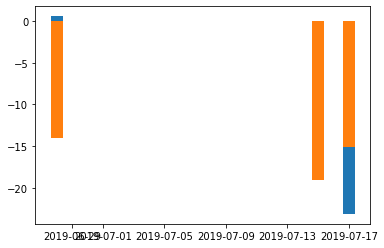

In [227]:
coins = ['Chainlink', 'Ethereum', 'Cardano']
heights = [
    more_10['24% change_chainlink'],
    more_10['24% change ETH_ETH'],
    more_10['24% change ETH_ADA'],
]
plt.bar(more_10.index[0:3], more_10['24% change_chainlink'][0:3])
plt.bar(more_10.index[0:3], more_10['24% change ETH_ETH'][0:3])

In [249]:
currency_hist['price above 20D MA'] = currency_hist['price'] > currency_hist['20D MA']
currency_hist

,price,20D MA,24% change BTC,price above 20D MA
2018-12-20,3687.750553,NaN,0.00,False
2018-12-21,4065.097238,NaN,9.28,False
2018-12-22,3846.227498,NaN,-5.69,False
2018-12-23,3960.567773,NaN,2.89,False
2018-12-24,3941.617740,NaN,-0.48,False
...,...,...,...,...
2021-02-22,57669.303527,46276.099355,2.24,True
2021-02-23,54410.856295,47222.342873,-5.99,True
2021-02-24,48691.894832,47782.201734,-11.75,True
2021-02-25,49849.378714,48433.845265,2.32,True


In [319]:
V2curr = currency_hist.join(link, lsuffix='_BTC', rsuffix='_link')
V3curr = V2curr[['price_BTC', 'price_link', 'price above 20D MA']]
V3curr

,price_BTC,price_link,price above 20D MA
2018-12-20,3687.750553,NaN,False
2018-12-21,4065.097238,0.332749,False
2018-12-22,3846.227498,0.291045,False
2018-12-23,3960.567773,0.301470,False
2018-12-24,3941.617740,0.305559,False
...,...,...,...
2021-02-22,57669.303527,34.247838,True
2021-02-23,54410.856295,31.668361,True
2021-02-24,48691.894832,25.758911,True
2021-02-25,49849.378714,28.158214,True


In [334]:

# selection = alt.selection_multi(fields=['price_BTC'])
# color = alt.condition(selection,
#                       alt.Color('price_BTC:N', legend=None),
#                       alt.value('lightgray'))

chart = alt.Chart(V3curr.reset_index()).mark_circle(opacity=0.7).encode(
        alt.X('index', axis=alt.Axis(title='Date')), alt.Y(
            'price_link',axis=alt.Axis(title='Price'), scale=alt.Scale(type='log')),
    size='price above 20D MA', color='price above 20D MA',
    )

chart



alt.Chart(...)

# Do this for marketcap

In [1]:
import altair as alt
import pandas as pd

source = pd.DataFrame.from_records([
      {"x": 0.5, "y": 0.5, "img": "https://vega.github.io/vega-datasets/data/ffox.png"},
      {"x": 1.5, "y": 1.5, "img": "https://vega.github.io/vega-datasets/data/gimp.png"},
      {"x": 2.5, "y": 2.5, "img": "https://vega.github.io/vega-datasets/data/7zip.png"}
])

alt.Chart(source).mark_image(
    width=50,
    height=50
).encode(
    x='x',
    y='y',
    url='img'
)

alt.Chart(...)

In [3]:
top_6 = ['bitcoin', 'ethereum', 'chainlink', 'polkadot', 'cardano', 'avalanche']

In [33]:
btc_history = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=365)
# btc_history['prices']

days = [i[0] for i in btc_history['prices']]
days = pd.to_datetime(days, unit='ms')

prices = [i[1] for i in btc_history['prices']]

days = days[:-1]
prices = prices[:-1]

data = {'date': days, 'price': prices}
df = pd.DataFrame(data=data)
df


,date,price
0,2020-02-27,8801.657129
1,2020-02-28,8781.175282
2,2020-02-29,8717.331431
3,2020-03-01,8552.989119
4,2020-03-02,8567.802249
...,...,...
360,2021-02-21,56377.633478
361,2021-02-22,57669.303527
362,2021-02-23,54410.856295
363,2021-02-24,48691.894832


In [365]:
weekly_dates = pd.date_range(currency_hist.index[0], currency_hist.index[-1], freq='W').to_series()
weekly_dates



2018-12-23   2018-12-23
2018-12-30   2018-12-30
2019-01-06   2019-01-06
2019-01-13   2019-01-13
2019-01-20   2019-01-20
                ...    
2021-01-24   2021-01-24
2021-01-31   2021-01-31
2021-02-07   2021-02-07
2021-02-14   2021-02-14
2021-02-21   2021-02-21
Freq: W-SUN, Length: 114, dtype: datetime64[ns]

In [371]:
#currency_hist[currency_hist.index.isin(s)]

currency_hist['week_number'] = currency_hist.index.isocalendar().week
currency_hist

,price,20D MA,24% change BTC,price above 20D MA,week_number
2018-12-20,3687.750553,NaN,0.00,False,51
2018-12-21,4065.097238,NaN,9.28,False,51
2018-12-22,3846.227498,NaN,-5.69,False,51
2018-12-23,3960.567773,NaN,2.89,False,51
2018-12-24,3941.617740,NaN,-0.48,False,52
...,...,...,...,...,...
2021-02-22,57669.303527,46276.099355,2.24,True,8
2021-02-23,54410.856295,47222.342873,-5.99,True,8
2021-02-24,48691.894832,47782.201734,-11.75,True,8
2021-02-25,49849.378714,48433.845265,2.32,True,8


In [373]:
BTC_priceW = get_history('bitcoin')
weekly_dates = pd.date_range(currency_hist.index[0], currency_hist.index[-1], freq='W').to_series()
BTC_priceW = BTC_priceW[BTC_priceW.index.isin(weekly_dates)]
BTC_priceW['week_number'] = BTC_priceW.index.isocalendar().week
BTC_priceW['20W MA'] = BTC_priceW.iloc[:,0].rolling(window=20).mean()
BTC_priceW

,price,week_number,20W MA
2018-12-30,3778.193940,52,NaN
2019-01-06,3787.307857,1,NaN
2019-01-13,3598.436347,2,NaN
2019-01-20,3674.587271,3,NaN
2019-01-27,3563.614563,4,NaN
...,...,...,...
2021-01-24,32068.087374,3,19437.107008
2021-01-31,34199.519810,4,20625.113765
2021-02-07,39279.412869,5,22034.884490
2021-02-14,46941.292086,6,23844.789451


In [374]:
ETH = get_history('ethereum')
ETH['week_number'] = ETH.index.isocalendar().week
ETH



,price,week_number
2018-12-27,129.511374,52
2018-12-28,114.101364,52
2018-12-29,134.019940,52
2018-12-30,138.754267,52
2018-12-31,137.631693,1
...,...,...
2021-03-01,1416.661553,9
2021-03-02,1570.399690,9
2021-03-03,1497.089104,9
2021-03-04,1579.427169,9


In [441]:
ETH20 = ETH.loc[ETH.index.year == 2020, :]
ETH20

BTC_priceW20 = BTC_priceW.loc[BTC_priceW.index.year == 2020, :]
BTC_priceW20

# ETH_20WBTC = pd.merge(ETH20.reset_index(), BTC_priceW20, on='week_number', how='left')
# ETH_20WBTC.tail(25)

BTC_priceW['year'] = BTC_priceW.index.year

In [455]:
BTC_priceW
BTC_priceW['weekyear'] = BTC_priceW[['week_number', 'year']].astype(str).apply(''.join, axis=1)

BTC_priceW

,price,week_number,20W MA,year,weekyear
2018-12-30,3778.193940,52,NaN,2018,522018
2019-01-06,3787.307857,1,NaN,2019,12019
2019-01-13,3598.436347,2,NaN,2019,22019
2019-01-20,3674.587271,3,NaN,2019,32019
2019-01-27,3563.614563,4,NaN,2019,42019
...,...,...,...,...,...
2021-01-24,32068.087374,3,19437.107008,2021,32021
2021-01-31,34199.519810,4,20625.113765,2021,42021
2021-02-07,39279.412869,5,22034.884490,2021,52021
2021-02-14,46941.292086,6,23844.789451,2021,62021


In [484]:
ETH['year'] = ETH.index.year
ETH['weekyear'] = ETH[['week_number', 'year']].astype(str).apply(''.join, axis=1)

#ETH

In [483]:
#BTC_priceW.head(60)

In [476]:
#BTCETH = currency_hist.join(eth, lsuffix='_BTC', rsuffix='_ETH')

ETH_20WBTC = pd.merge(ETH.reset_index(), BTC_priceW, on='weekyear', how='outer')
ETH_20WBTC['20W MA'].fillna(method='ffill', inplace=True)
print(ETH_20WBTC.shape)
ETH_20WBTC

(800, 9)


,index,price_x,week_number_x,year_x,weekyear,price_y,week_number_y,20W MA,year_y
0,2018-12-27,129.511374,52,2018,522018,3778.19394,52,NaN,2018.0
1,2018-12-28,114.101364,52,2018,522018,3778.19394,52,NaN,2018.0
2,2018-12-29,134.019940,52,2018,522018,3778.19394,52,NaN,2018.0
3,2018-12-30,138.754267,52,2018,522018,3778.19394,52,NaN,2018.0
4,2018-12-31,137.631693,1,2018,12018,NaN,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...
795,2021-03-01,1416.661553,9,2021,92021,NaN,<NA>,NaN,NaN
796,2021-03-02,1570.399690,9,2021,92021,NaN,<NA>,NaN,NaN
797,2021-03-03,1497.089104,9,2021,92021,NaN,<NA>,NaN,NaN
798,2021-03-04,1579.427169,9,2021,92021,NaN,<NA>,NaN,NaN


In [482]:
ETH_20WBTC.tail(100)

,index,price_x,week_number_x,year_x,weekyear,price_y,week_number_y,20W MA,year_y
700,2020-11-26,568.275153,48,2020,482020,17718.972833,48,12364.240483,2020.0
701,2020-11-27,518.467045,48,2020,482020,17718.972833,48,12364.240483,2020.0
702,2020-11-28,517.553026,48,2020,482020,17718.972833,48,12364.240483,2020.0
703,2020-11-29,537.392612,48,2020,482020,17718.972833,48,12364.240483,2020.0
704,2020-11-30,574.751120,49,2020,492020,19139.111575,49,12862.775925,2020.0
705,2020-12-01,612.263786,49,2020,492020,19139.111575,49,12862.775925,2020.0
706,2020-12-02,589.581844,49,2020,492020,19139.111575,49,12862.775925,2020.0
707,2020-12-03,598.760610,49,2020,492020,19139.111575,49,12862.775925,2020.0
708,2020-12-04,616.506662,49,2020,492020,19139.111575,49,12862.775925,2020.0
709,2020-12-05,571.190432,49,2020,492020,19139.111575,49,12862.775925,2020.0


In [ ]:
ETH_20WBTC['20W MA'].fillna(method='ffill', inplace=True)

In [620]:
ETHss = get_history("ethereum")

In [622]:
ETHss['20D MA'] = ETHss.iloc[:,0].rolling(window=20).mean()

In [625]:
ETHss.tail(100)

,price,20D MA
2020-12-06,595.919414,551.203485
2020-12-07,601.968935,558.233372
2020-12-08,592.386507,563.742778
2020-12-09,554.329674,567.487378
2020-12-10,573.895309,572.616246
2020-12-11,560.454265,575.199349
2020-12-12,545.982835,575.056385
2020-12-13,568.358753,575.448878
2020-12-14,590.324440,574.551434
2020-12-15,585.541895,573.695216


In [486]:
ETH_20WBTC['20D MA'] = ETH_20WBTC.iloc[:,1].rolling(window=20).mean()

In [619]:
ETH_20WBTC.tail(40)

,index,price_x,week_number_x,year_x,weekyear,price_y,week_number_y,20W MA,year_y,20D MA
760,2021-01-25,1392.539763,4,2021,42021,34199.519810,4,20625.113765,2021.0,1222.379692
761,2021-01-26,1323.429503,4,2021,42021,34199.519810,4,20625.113765,2021.0,1233.383255
762,2021-01-27,1355.233724,4,2021,42021,34199.519810,4,20625.113765,2021.0,1240.716186
763,2021-01-28,1253.141672,4,2021,42021,34199.519810,4,20625.113765,2021.0,1241.899704
764,2021-01-29,1328.773619,4,2021,42021,34199.519810,4,20625.113765,2021.0,1247.151901
765,2021-01-30,1380.284259,4,2021,42021,34199.519810,4,20625.113765,2021.0,1252.017135
766,2021-01-31,1372.427229,4,2021,42021,34199.519810,4,20625.113765,2021.0,1257.251946
767,2021-02-01,1317.047436,5,2021,52021,39279.412869,5,22034.884490,2021.0,1268.458601
768,2021-02-02,1368.664455,5,2021,52021,39279.412869,5,22034.884490,2021.0,1284.621483
769,2021-02-03,1514.225196,5,2021,52021,39279.412869,5,22034.884490,2021.0,1303.731963


In [473]:
import pandas
pandas.set_option('display.max_rows', 200)

In [419]:
ETH_20WBTC[['price_y', '20W MA', 'index', 'week_number']].head(60)
#ETH.loc[(ETH['week_number'] == 52) & (ETH.index.year == 2018),:]['price']

2018-12-27    129.511374
2018-12-28    114.101364
2018-12-29    134.019940
2018-12-30    138.754267
Name: price, dtype: float64

In [400]:
ETH

,price,week_number
2018-12-27,129.511374,52
2018-12-28,114.101364,52
2018-12-29,134.019940,52
2018-12-30,138.754267,52
2018-12-31,137.631693,1
...,...,...
2021-03-01,1416.661553,9
2021-03-02,1570.399690,9
2021-03-03,1497.089104,9
2021-03-04,1579.427169,9


In [144]:
days = [i[0] for i in btc_history['prices']]
#days

In [143]:
prices = [i[1] for i in btc_history['prices']]
#prices

In [129]:
# from datetime import datetime
# import time
# time.gmtime(int(1613001600000))
# #datetime.utcfromtimestamp(1613001600000).strftime('%Y-%m-%dT%H:%M:%SZ')
# utc_time = datetime.utcfromtimestamp(1614231903000)
# print(utc_time.strftime("%Y-%m-%d %H:%M:%S.%f+00:00 (UTC)"))

ValueError: year 53122 is out of range

In [138]:
days = pd.to_datetime(days, unit='ms')

In [77]:
# response = requests.get("https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd")
# resjson = response.json()
# resjson

{'bitcoin': {'usd': 51202}}

In [142]:
data = {'date': days, 'price': prices}
df = pd.DataFrame(data=data)
df

,date,price
0,2020-11-18 00:00:00,17651.820428
1,2020-11-19 00:00:00,17829.934958
2,2020-11-20 00:00:00,17819.757431
3,2020-11-21 00:00:00,18628.813489
4,2020-11-22 00:00:00,18689.528656
5,2020-11-23 00:00:00,18390.611844
6,2020-11-24 00:00:00,18360.693300
7,2020-11-25 00:00:00,19091.524182
8,2020-11-26 00:00:00,18753.288922
9,2020-11-27 00:00:00,17138.029512


In [140]:
df.head()

,0
17651.820428,2020-11-18
17829.934958,2020-11-19
17819.757431,2020-11-20
18628.813489,2020-11-21
18689.528656,2020-11-22


In [59]:
cg.get_coins_list()

[{'id': '', 'symbol': 'can', 'name': 'Channels'},
 {'id': '01coin', 'symbol': 'zoc', 'name': '01coin'},
 {'id': '0-5x-long-algorand-token',
  'symbol': 'algohalf',
  'name': '0.5X Long Algorand Token'},
 {'id': '0-5x-long-altcoin-index-token',
  'symbol': 'althalf',
  'name': '0.5X Long Altcoin Index Token'},
 {'id': '0-5x-long-balancer-token',
  'symbol': 'balhalf',
  'name': '0.5X Long Balancer Token'},
 {'id': '0-5x-long-bitcoin-cash-token',
  'symbol': 'bchhalf',
  'name': '0.5X Long Bitcoin Cash Token'},
 {'id': '0-5x-long-bitcoin-sv-token',
  'symbol': 'bsvhalf',
  'name': '0.5X Long Bitcoin SV Token'},
 {'id': '0-5x-long-bitcoin-token',
  'symbol': 'half',
  'name': '0.5X Long Bitcoin Token'},
 {'id': '0-5x-long-cardano-token',
  'symbol': 'adahalf',
  'name': '0.5X Long Cardano Token'},
 {'id': '0-5x-long-chainlink-token',
  'symbol': 'linkhalf',
  'name': '0.5X Long Chainlink Token'},
 {'id': '0-5x-long-cosmos-token',
  'symbol': 'atomhalf',
  'name': '0.5X Long Cosmos Token'}

In [60]:
def get_historyV1(coin):
    coin_history = cg.get_coin_market_chart_by_id(id=coin, vs_currency='usd', days=365)

    days = [i[0] for i in coin_history['prices']]
    days = pd.to_datetime(days, unit='ms')

    prices = [i[1] for i in coin_history['prices']]

    days = days[:-1]
    prices = prices[:-1]

#    data = 
    df = pd.DataFrame(data={'price': prices}, index=days)
    
    return df

def get_historyV2(coin):
    coin_history = cg.get_coin_market_chart_by_id(id=coin, vs_currency='usd', days=365)

    days = [i[0] for i in coin_history['prices']]
    days = pd.to_datetime(days, unit='ms')

    prices = [i[1] for i in coin_history['prices']]

#    data = 
    df = pd.DataFrame(data={'price': prices}, index=days)
    
    return df

    

In [61]:
get_historyV1('bitcoin')

,price
2020-02-27,8801.657129
2020-02-28,8781.175282
2020-02-29,8717.331431
2020-03-01,8552.989119
2020-03-02,8567.802249
...,...
2021-02-21,56377.633478
2021-02-22,57669.303527
2021-02-23,54410.856295
2021-02-24,48691.894832


In [62]:
get_historyV2('bitcoin')

,price
2020-02-27 00:00:00,8801.657129
2020-02-28 00:00:00,8781.175282
2020-02-29 00:00:00,8717.331431
2020-03-01 00:00:00,8552.989119
2020-03-02 00:00:00,8567.802249
...,...
2021-02-22 00:00:00,57669.303527
2021-02-23 00:00:00,54410.856295
2021-02-24 00:00:00,48691.894832
2021-02-25 00:00:00,49849.378714


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`